
# Pewter Analytics' Analysis of King County Housing Data

# Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

# Business Problem

The city of Seattle is looking to improve low property value neighborhoods. They are looking to upgrade infrastructure and give grants to homeowners in neighborhoods with low-grade houses to improve the property value of the neighborhood. They want to know which neighborhoods would benefit the most from infrastructure upgrades and grants. They want to know what should the homeowners use their grants for to improve the property value the most, and how can they improve infrastructure to increase the property value of the neighborhood?


Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

# Exploratory Data Analysis and Data Cleaning

The dataset consists of data on individual houses from King County in Washington state. This dataset consists of data from houses sold between May 2014 to May 2015. Using this data, we will be looking to make recommendations to the city of seattle on which variables will increase the property value the most. There are 21598 rows and 21 columns in this dataset. Our target variable in this dataset will be the "price" column, which is the amount the house was sold for.

A list and description of all columns can be found [here](https://github.com/Jyve00/Project2/blob/main/Data/column_names.md)

We intend to use the columns in our final model.:
- Latitude
- Grade
- Sqft_living
- View
- Condition
- Longitude
- Sqft lot
- Floors
- Year built





---

Each group member took an equal spread of columns to perform exploratory analysis on.

Price, grade, date, yr_built, yr_renovated, and floors were explored by [Matthew](https://github.com/Jyve00/Project2/blob/Matthew/notebooks/Matthew/Matthew-EDA.ipynb).

Condition, Waterfront, zipcode, Latitude, coordinate, long, and lat were explored by [Stephen](https://github.com/Jyve00/Project2/blob/stephen/notebooks/Stephen/data_clean.ipynb).

View, bedrooms - Number of bedrooms, bathrooms, sqft_living, and sqft_lot were explored by [Tony](https://github.com/Jyve00/Project2/blob/Tony/notebooks/Tony/DataCleaning.ipynb).

**Our exploratory analysis and cleaning of the columns in our final model can also be found below.**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# Import data
kc = pd.read_csv('../../Data/kc_house_data.csv')

kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Latitude/Longitude

In [63]:
# No null values in latitude, but let's check for placeholder values just in case
kc['lat'].value_counts()

47.6846    17
47.5322    17
47.6624    17
47.5491    17
47.6886    16
           ..
47.3104     1
47.4681     1
47.2819     1
47.6096     1
47.4300     1
Name: lat, Length: 5033, dtype: int64

In [65]:
# Lets check longitude as well since it is related
kc['long'].value_counts()

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.803      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 751, dtype: int64

## Grade

In [37]:
# Lets take a look at Grade, something that will be important for my group moving forward.
kc['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [38]:
# This is, undoubtedly, a categorical variable. This will need to be changed for our modeling later.
kc['grade'] = kc['grade'].str.split(' ').str[0].astype(int)

kc['grade'] = kc['grade'].astype('category').cat.codes

In [39]:
# Ensure Grade has been transformed
kc['grade'].value_counts()

4     8974
5     6065
6     2615
3     2038
7     1134
8      399
2      242
9       89
1       27
10      13
0        1
Name: grade, dtype: int64

## Sqft Living/Lot

In [40]:
# No null values in Sqft_Living, but let's check for placeholder values just in case
kc['sqft_living'].value_counts()


1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

<AxesSubplot:>

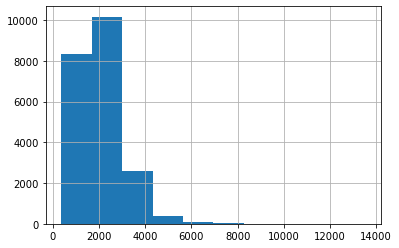

In [41]:
kc['sqft_living'].hist()

Nothing looks out of the ordinary here, though most of the values seem to be around 2000-3000 sqft.

In [66]:
kc['sqft_lot'].value_counts()


5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

<AxesSubplot:>

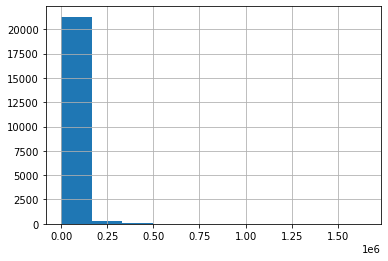

In [68]:
kc['sqft_lot'].hist()

## View

In [42]:
kc['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [43]:
# We will Encode this variable so we can use it in our model
kc['view'].replace({ 'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 5}, inplace=True)
kc['view'] = kc['view'].astype('float')

In [57]:
# Validate change
kc['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
5.0      317
Name: view, dtype: int64

## Condition

In [59]:
kc['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [60]:
# Another categorical variable that we will encode
kc['condition'].replace({ 'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace=True)

In [61]:
# Verify Successful Change
kc['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

## Floors

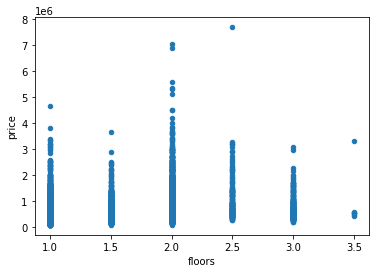

In [69]:
# Lets make sure that Floors" isn't categorical either
kc.plot(kind='scatter', x='floors', y='price');

In [70]:
kc['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [73]:
# We only have 6 distinct categories, so lets encode them using one-hot encoding
kc = pd.get_dummies(data=kc, columns=['floors'], drop_first=True)

# Verify expected changes
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int8   
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Year Built

In [74]:
# Checking for abnormalities in the data
kc['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

<AxesSubplot:>

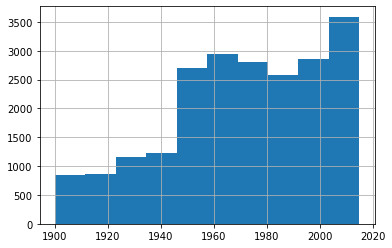

In [75]:
kc['yr_built'].hist()

# Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [44]:
# code here to prepare your data

# Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

# Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [45]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [46]:
# code here for your first 'substandard' model

In [47]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [48]:
# code here to iteratively improve your models

In [49]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [50]:
# code here to show your final model

In [51]:
# code here to evaluate your final model

In [52]:
import pandas as np

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.


Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
